In [1]:
# This Python 3 environment comes with many helpful analytics libraries installed
# It is defined by the kaggle/python Docker image: https://github.com/kaggle/docker-python
# For example, here's several helpful packages to load

import numpy as np # linear algebra
import pandas as pd # data processing, CSV file I/O (e.g. pd.read_csv)

# Input data files are available in the read-only "../input/" directory
# For example, running this (by clicking run or pressing Shift+Enter) will list all files under the input directory

import os
for dirname, _, filenames in os.walk('/kaggle/input'):
    for filename in filenames:
        print(os.path.join(dirname, filename))

# You can write up to 20GB to the current directory (/kaggle/working/) that gets preserved as output when you create a version using "Save & Run All" 
# You can also write temporary files to /kaggle/temp/, but they won't be saved outside of the current session

/kaggle/input/pulsar-starscsv/pulsar_stars.csv


'''
The Pulsar Star Dataset comprises observations of potential pulsars, which are highly magnetized, rotating neutron stars emitting electromagnetic radiation. This dataset, often used in machine learning research, contains attributes derived from pulsar candidates and noise signals, including various signal statistics and profiles. It serves as a benchmark for classification algorithms aiming to distinguish genuine pulsar signals from radio frequency interference and noise. With its 17,898 instances and multiple features, such as integrated profile and dispersion measure, the dataset offers a comprehensive resource for developing and testing classification models, facilitating advancements in astrophysical research and signal processing techniques.
'''

### Importing Libraries

In [2]:
import numpy as np 
import pandas as pd 
import matplotlib.pyplot as plt
import seaborn as sns


#### Reading the csv file

In [3]:
df=pd.read_csv('/kaggle/input/pulsar-starscsv/pulsar_stars.csv')
df

,Mean of the integrated profile,Standard deviation of the integrated profile,Excess kurtosis of the integrated profile,Skewness of the integrated profile,Mean of the DM-SNR curve,Standard deviation of the DM-SNR curve,Excess kurtosis of the DM-SNR curve,Skewness of the DM-SNR curve,target_class
0,140.562500,55.683782,-0.234571,-0.699648,3.199833,19.110426,7.975532,74.242225,0
1,102.507812,58.882430,0.465318,-0.515088,1.677258,14.860146,10.576487,127.393580,0
2,103.015625,39.341649,0.323328,1.051164,3.121237,21.744669,7.735822,63.171909,0
3,136.750000,57.178449,-0.068415,-0.636238,3.642977,20.959280,6.896499,53.593661,0
4,88.726562,40.672225,0.600866,1.123492,1.178930,11.468720,14.269573,252.567306,0
...,...,...,...,...,...,...,...,...,...
17893,136.429688,59.847421,-0.187846,-0.738123,1.296823,12.166062,15.450260,285.931022,0
17894,122.554688,49.485605,0.127978,0.323061,16.409699,44.626893,2.945244,8.297092,0
17895,119.335938,59.935939,0.159363,-0.743025,21.430602,58.872000,2.499517,4.595173,0
17896,114.507812,53.902400,0.201161,-0.024789,1.946488,13.381731,10.007967,134.238910,0


In [4]:
df.columns

Index([' Mean of the integrated profile',
       ' Standard deviation of the integrated profile',
       ' Excess kurtosis of the integrated profile',
       ' Skewness of the integrated profile', ' Mean of the DM-SNR curve',
       ' Standard deviation of the DM-SNR curve',
       ' Excess kurtosis of the DM-SNR curve', ' Skewness of the DM-SNR curve',
       'target_class'],
      dtype='object')

In [5]:
#removing spaces from the columns
df.columns=df.columns.str.strip()
df.columns

Index(['Mean of the integrated profile',
       'Standard deviation of the integrated profile',
       'Excess kurtosis of the integrated profile',
       'Skewness of the integrated profile', 'Mean of the DM-SNR curve',
       'Standard deviation of the DM-SNR curve',
       'Excess kurtosis of the DM-SNR curve', 'Skewness of the DM-SNR curve',
       'target_class'],
      dtype='object')

In [6]:
# Renaming the columns
df.columns=['IP Mean','IP Sd','IP Kurtosis','IP Skewness','DM-SNR Mean',
             'DM-SNR Sd','DM-SNR Kurtosis','DM-SNR Skewness','target_class']
df.columns

Index(['IP Mean', 'IP Sd', 'IP Kurtosis', 'IP Skewness', 'DM-SNR Mean',
       'DM-SNR Sd', 'DM-SNR Kurtosis', 'DM-SNR Skewness', 'target_class'],
      dtype='object')

In [7]:
# providing insight into the distribution of classes in the target class column.

df['target_class'].value_counts()

target_class
0    16259
1     1639
Name: count, dtype: int64

In [8]:
df['target_class'].value_counts()/len(df)

target_class
0    0.908426
1    0.091574
Name: count, dtype: float64

In [70]:
# summary the number of entries, the data types of each column, and the memory usage.
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 17898 entries, 0 to 17897
Data columns (total 9 columns):
 #   Column           Non-Null Count  Dtype  
---  ------           --------------  -----  
 0   IP Mean          17898 non-null  float64
 1   IP Sd            17898 non-null  float64
 2   IP Kurtosis      17898 non-null  float64
 3   IP Skewness      17898 non-null  float64
 4   DM-SNR Mean      17898 non-null  float64
 5   DM-SNR Sd        17898 non-null  float64
 6   DM-SNR Kurtosis  17898 non-null  float64
 7   DM-SNR Skewness  17898 non-null  float64
 8   target_class     17898 non-null  int64  
dtypes: float64(8), int64(1)
memory usage: 1.2 MB


In [71]:
# summary of missing values in each column
df.isnull().sum()

IP Mean            0
IP Sd              0
IP Kurtosis        0
IP Skewness        0
DM-SNR Mean        0
DM-SNR Sd          0
DM-SNR Kurtosis    0
DM-SNR Skewness    0
target_class       0
dtype: int64

In [72]:
#statistical summary of numerical columns
round(df.describe(),2)

,IP Mean,IP Sd,IP Kurtosis,IP Skewness,DM-SNR Mean,DM-SNR Sd,DM-SNR Kurtosis,DM-SNR Skewness,target_class
count,17898.00,17898.00,17898.00,17898.00,17898.00,17898.00,17898.00,17898.00,17898.00
mean,111.08,46.55,0.48,1.77,12.61,26.33,8.30,104.86,0.09
std,25.65,6.84,1.06,6.17,29.47,19.47,4.51,106.51,0.29
min,5.81,24.77,-1.88,-1.79,0.21,7.37,-3.14,-1.98,0.00
25%,100.93,42.38,0.03,-0.19,1.92,14.44,5.78,34.96,0.00
50%,115.08,46.95,0.22,0.20,2.80,18.46,8.43,83.06,0.00
75%,127.09,51.02,0.47,0.93,5.46,28.43,10.70,139.31,0.00
max,192.62,98.78,8.07,68.10,223.39,110.64,34.54,1191.00,1.00


### Univariate Analysis

#### Visulaization of Numerical Columns

Text(0, 0.5, 'DM-SNR Skewness')

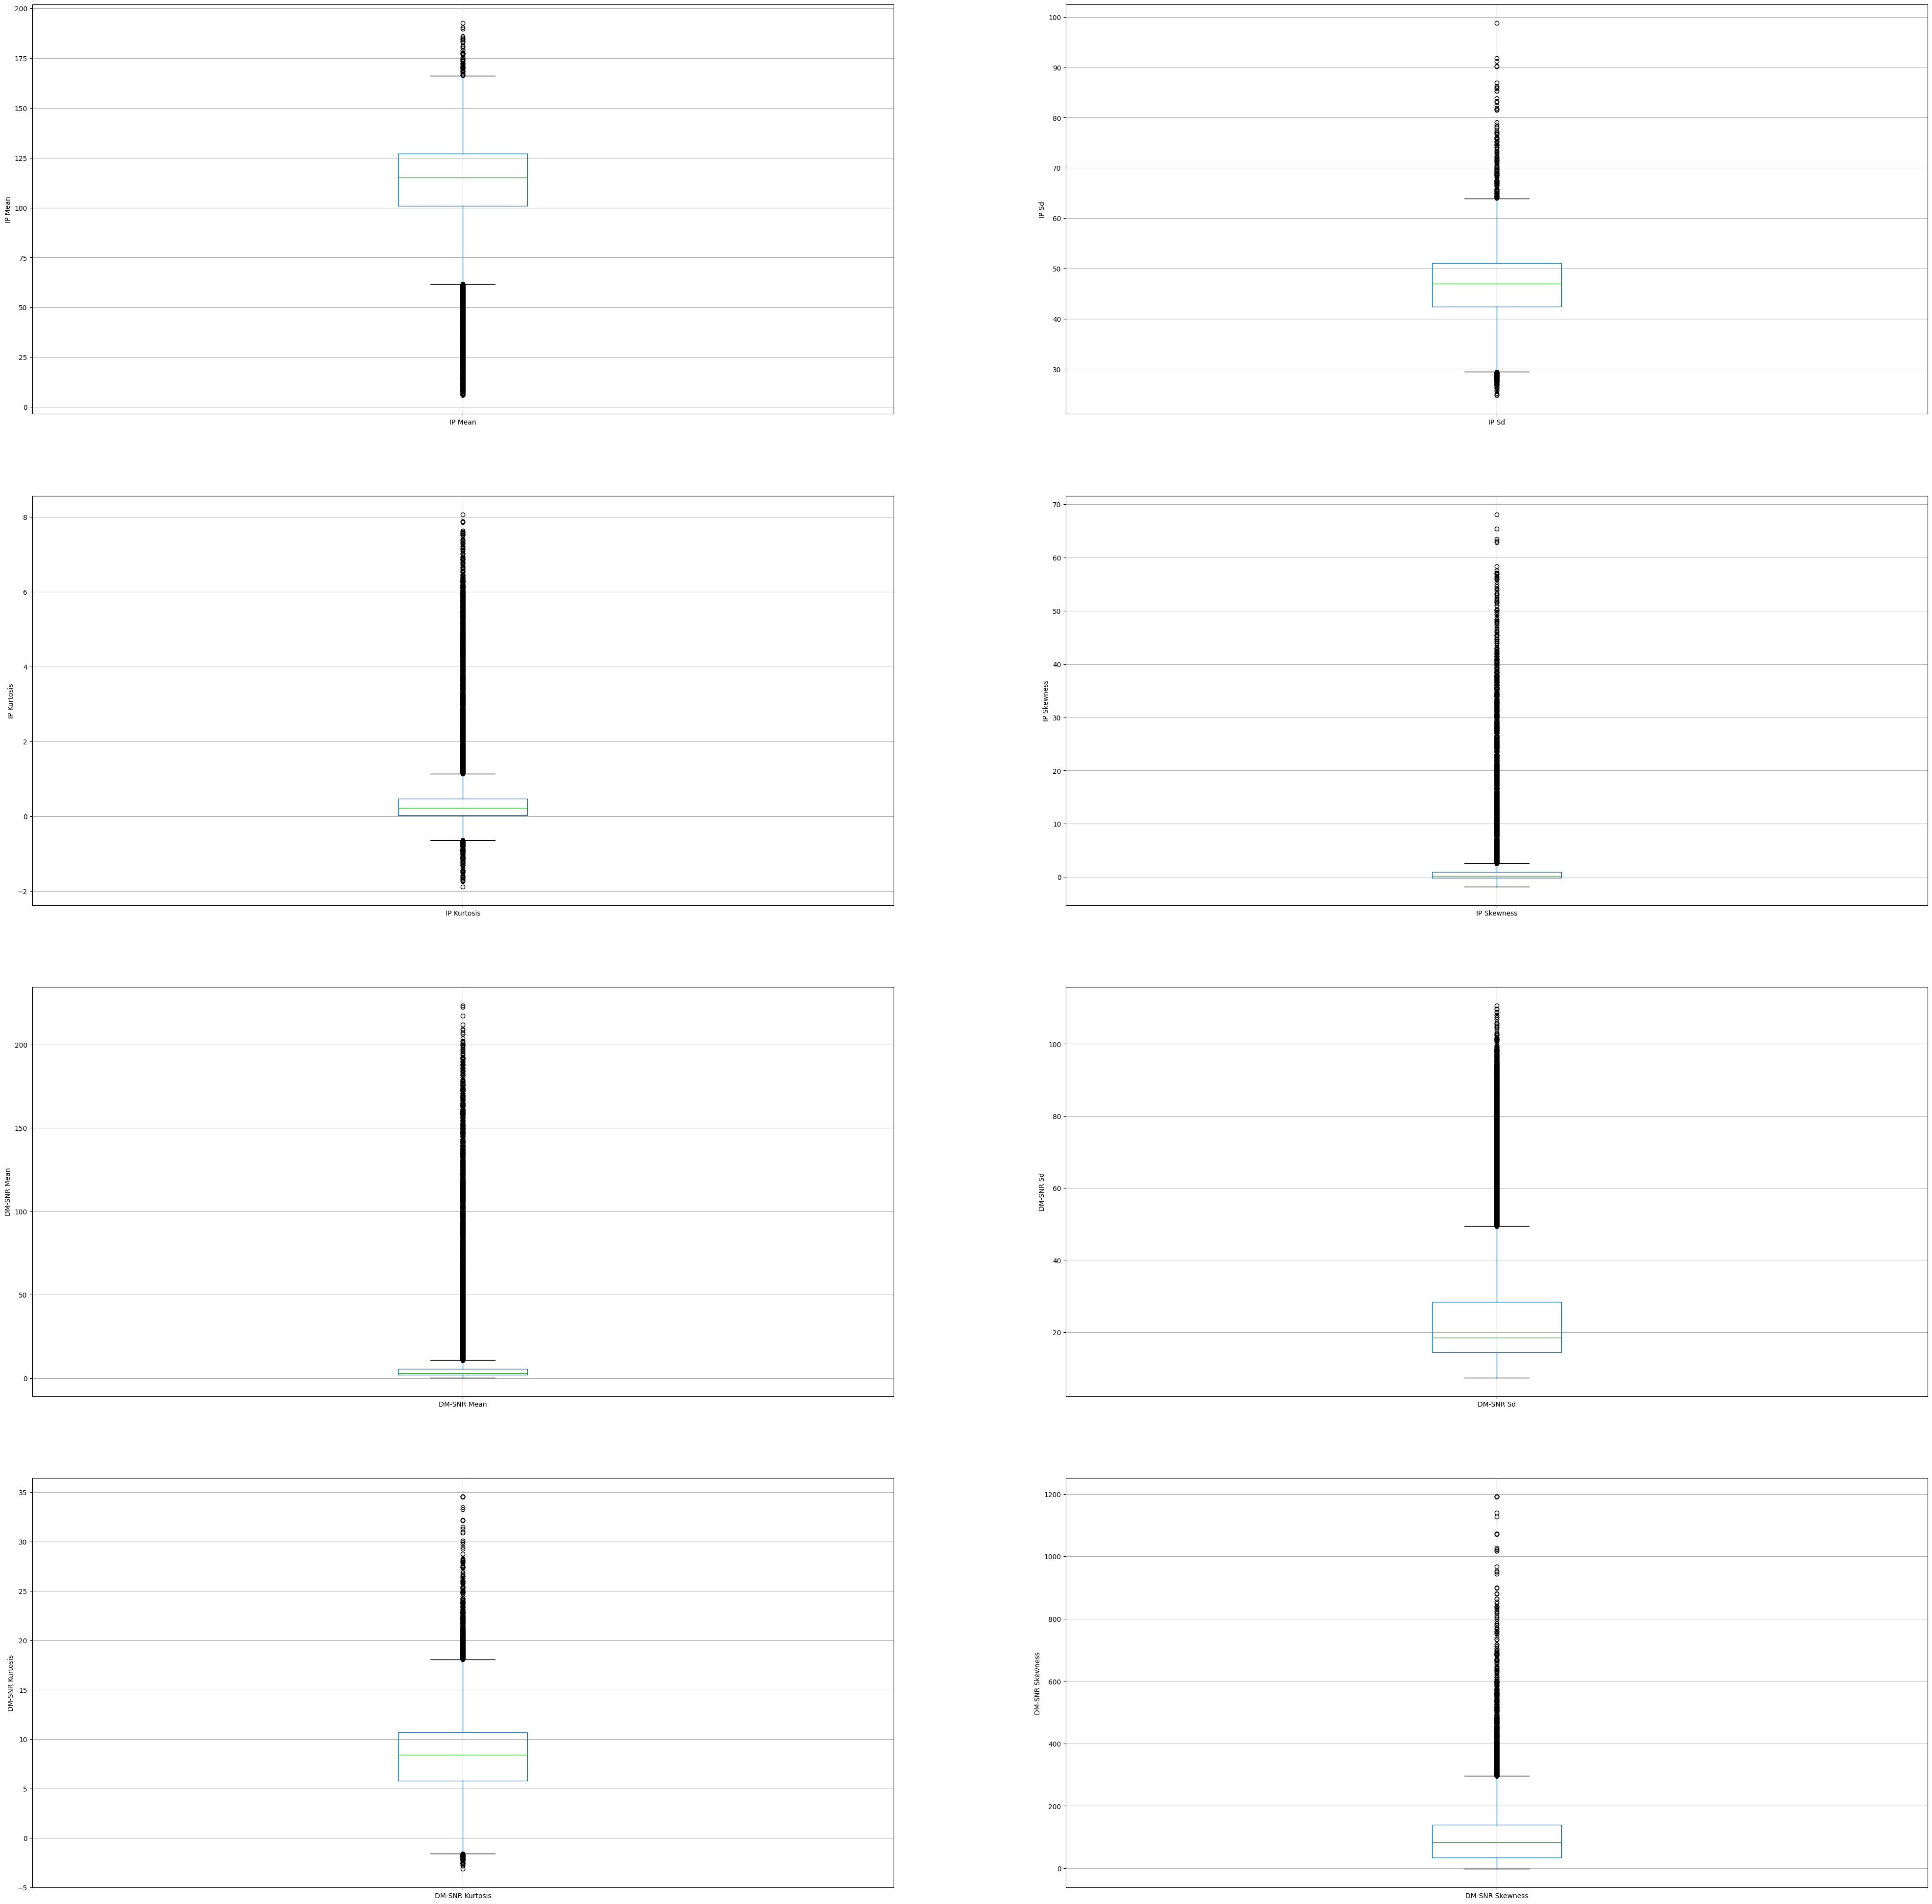

In [73]:
plt.rcParams['figure.figsize']=(50,50)
plt.subplot(4,2,1)
fig=df.boxplot(column='IP Mean')
fig.set_ylabel('IP Mean')

plt.subplot(4,2,2)
fig=df.boxplot(column='IP Sd')
fig.set_ylabel('IP Sd')

plt.subplot(4,2,3)
fig=df.boxplot(column='IP Kurtosis')
fig.set_ylabel('IP Kurtosis')

plt.subplot(4,2,4)
fig=df.boxplot(column='IP Skewness')
fig.set_ylabel('IP Skewness')

plt.subplot(4,2,5)
fig=df.boxplot(column='DM-SNR Mean')
fig.set_ylabel('DM-SNR Mean')

plt.subplot(4,2,6)
fig=df.boxplot(column='DM-SNR Sd')
fig.set_ylabel('DM-SNR Sd')

plt.subplot(4,2,7)
fig=df.boxplot(column='DM-SNR Kurtosis')
fig.set_ylabel('DM-SNR Kurtosis')

plt.subplot(4,2,8)
fig=df.boxplot(column='DM-SNR Skewness')
fig.set_ylabel('DM-SNR Skewness')

Text(0, 0.5, 'Number of Pulse Stars')

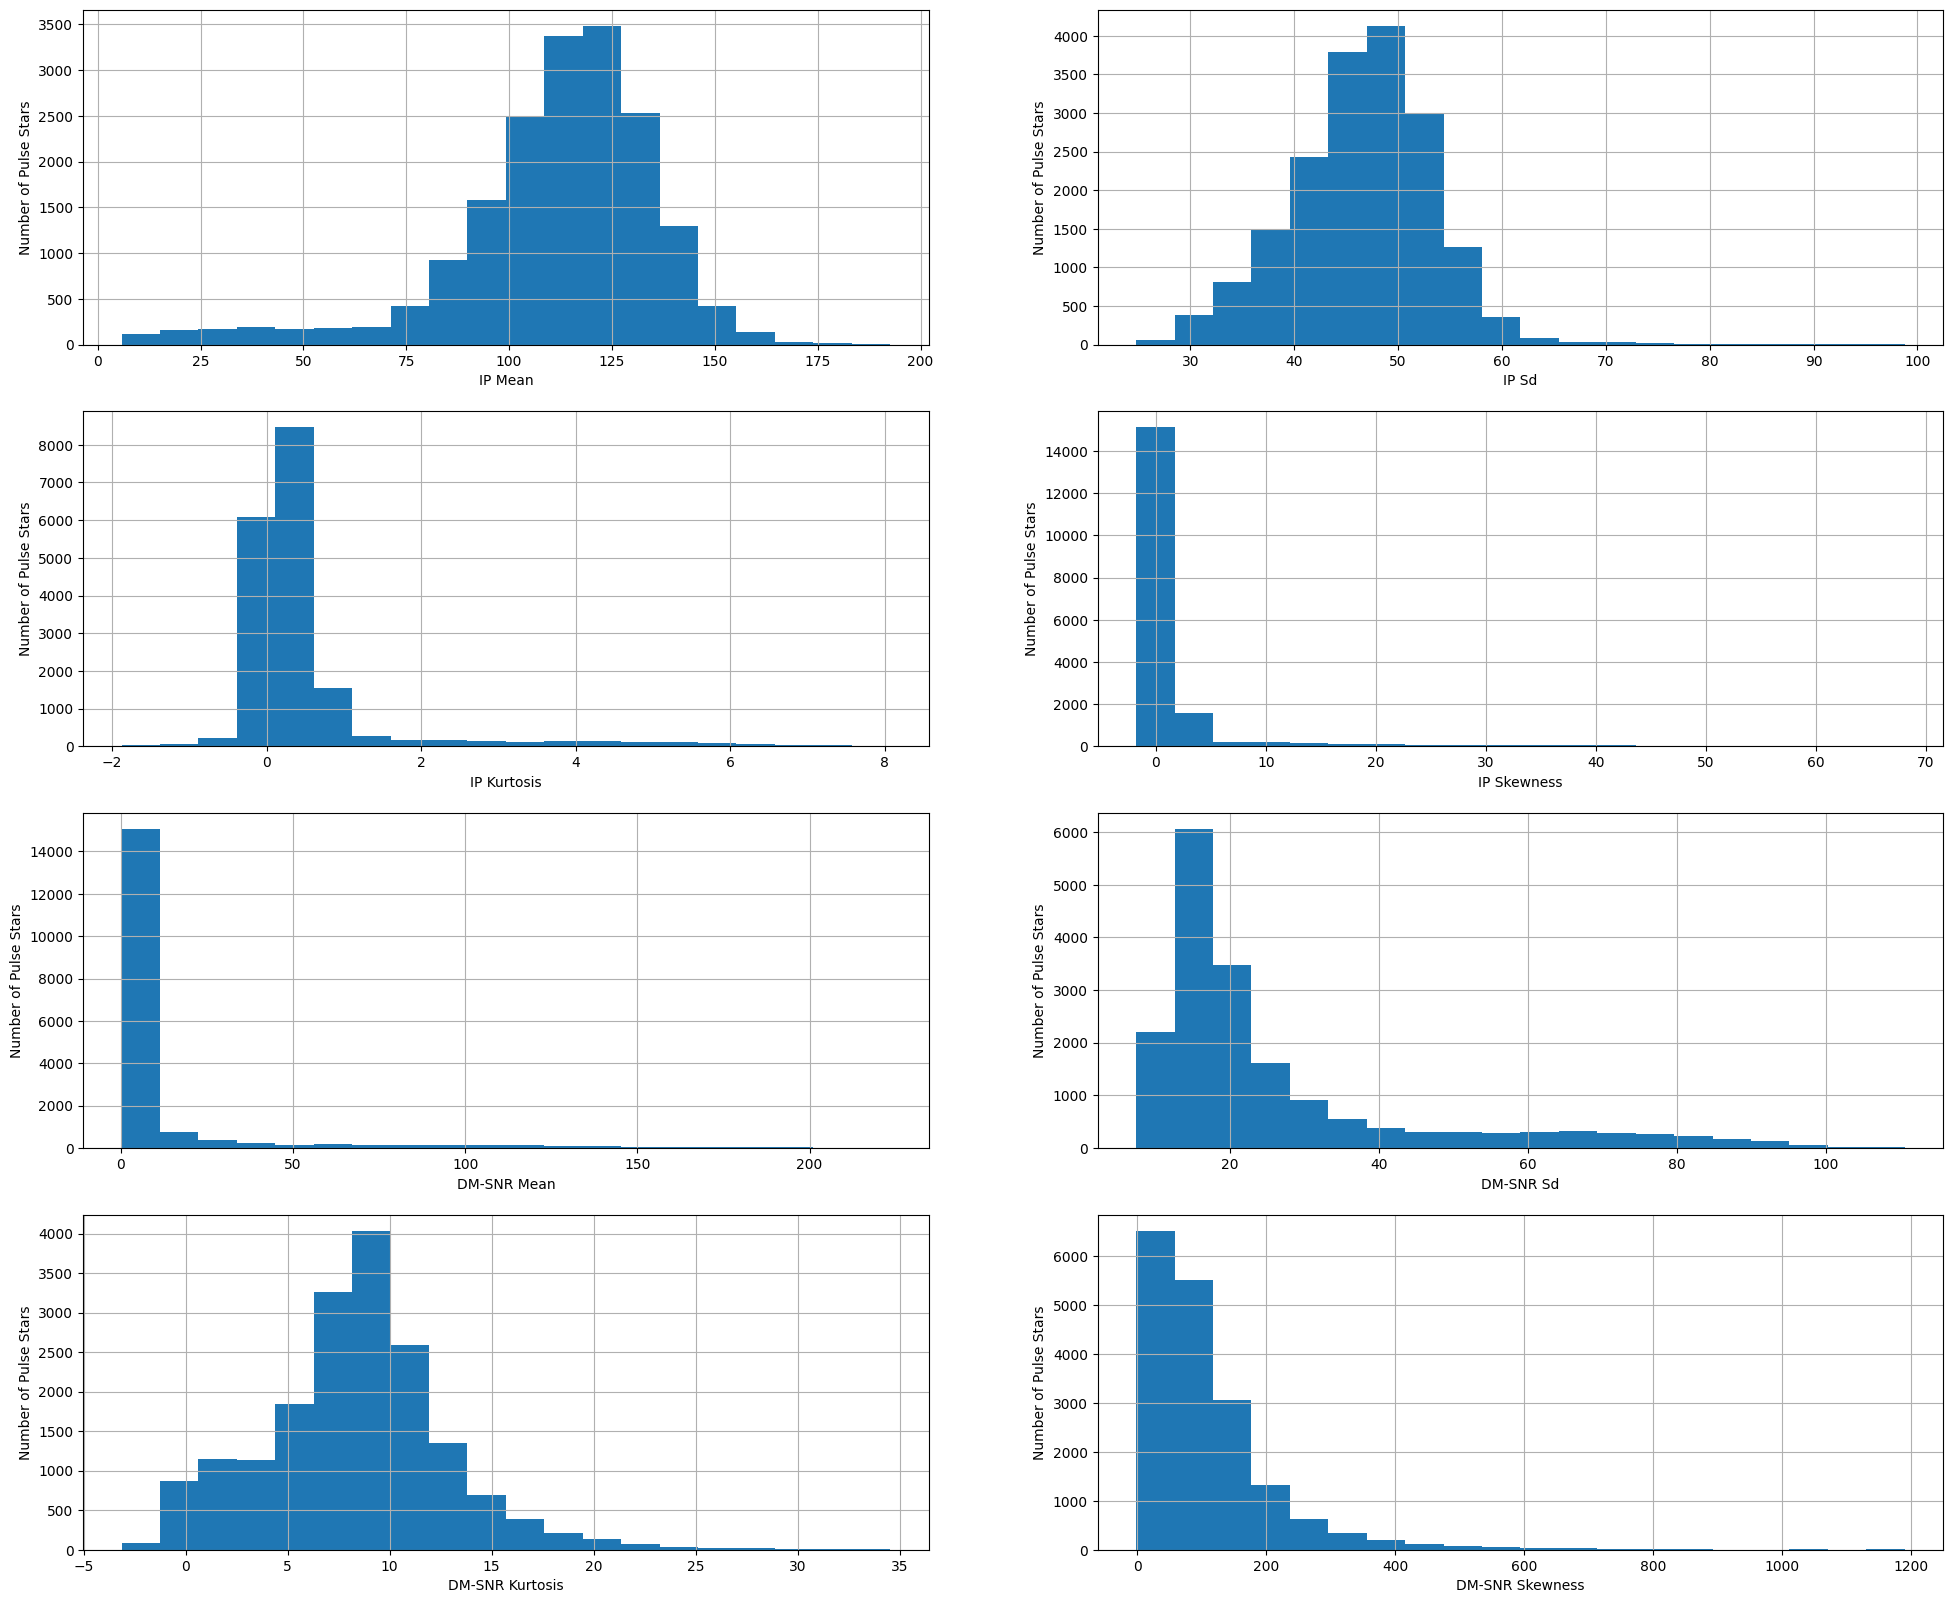

In [74]:
plt.rcParams['figure.figsize']=(24,20)

plt.subplot(4,2,1)
fig=df['IP Mean'].hist(bins=20)
fig.set_xlabel('IP Mean')
fig.set_ylabel('Number of Pulse Stars')

plt.subplot(4,2,2)
fig=df['IP Sd'].hist(bins=20)
fig.set_xlabel('IP Sd')
fig.set_ylabel('Number of Pulse Stars')

plt.subplot(4,2,3)
fig=df['IP Kurtosis'].hist(bins=20)
fig.set_xlabel('IP Kurtosis')
fig.set_ylabel('Number of Pulse Stars')

plt.subplot(4,2,4)
fig=df['IP Skewness'].hist(bins=20)
fig.set_xlabel('IP Skewness')
fig.set_ylabel('Number of Pulse Stars')

plt.subplot(4,2,5)
fig=df['DM-SNR Mean'].hist(bins=20)
fig.set_xlabel('DM-SNR Mean')
fig.set_ylabel('Number of Pulse Stars')

plt.subplot(4,2,6)
fig=df['DM-SNR Sd'].hist(bins=20)
fig.set_xlabel('DM-SNR Sd')
fig.set_ylabel('Number of Pulse Stars')

plt.subplot(4,2,7)
fig=df['DM-SNR Kurtosis'].hist(bins=20)
fig.set_xlabel('DM-SNR Kurtosis')
fig.set_ylabel('Number of Pulse Stars')

plt.subplot(4,2,8)
fig=df['DM-SNR Skewness'].hist(bins=20)
fig.set_xlabel('DM-SNR Skewness')
fig.set_ylabel('Number of Pulse Stars')

In [9]:
#Partitioning features and target variable
X=df.drop(['target_class'],axis=1)
y=df['target_class']

In [10]:
# Splitting the dataset into training and testing datasets

from sklearn.model_selection import train_test_split
X_train,X_test,y_train,y_test=train_test_split(X,y,test_size=0.2,random_state=0)
X_train.shape,X_test.shape

((14318, 8), (3580, 8))

In [11]:
y_train.shape,y_test.shape

((14318,), (3580,))

In [12]:
X_cols=X_train.columns
X_cols

Index(['IP Mean', 'IP Sd', 'IP Kurtosis', 'IP Skewness', 'DM-SNR Mean',
       'DM-SNR Sd', 'DM-SNR Kurtosis', 'DM-SNR Skewness'],
      dtype='object')

#### Data Preprocessing

In [13]:
#Standardize the features in the dataset using StandardScaler,mean=0 and std=1
from sklearn.preprocessing import StandardScaler

ss=StandardScaler()
X_train=ss.fit_transform(X_train)
X_test=ss.transform(X_test)
X_train.shape

(14318, 8)

In [14]:
X_train

array([[ 0.37710226,  0.18643192, -0.21304291, ...,  0.44549441,
        -0.76498842, -0.76290015],
       [ 0.21958464,  0.31196312, -0.26882602, ..., -0.50223528,
        -0.02369848, -0.18468066],
       [-1.69954017,  1.69907806,  1.24841321, ...,  2.76415609,
        -1.68875303, -0.99342536],
       ...,
       [ 0.85989527,  1.30048377, -0.53883092, ..., -0.70400108,
         0.86454539,  0.72634848],
       [-0.48909406,  0.32693924, -0.16326221, ..., -0.52295477,
         0.42754025,  0.17299088],
       [-0.1855037 , -0.6554599 , -0.06217857, ..., -0.33325097,
        -0.21258789, -0.43037012]])

In [15]:
X_train_df=pd.DataFrame(X_train,columns=X_cols)
X_train_df.head()

,IP Mean,IP Sd,IP Kurtosis,IP Skewness,DM-SNR Mean,DM-SNR Sd,DM-SNR Kurtosis,DM-SNR Skewness
0,0.377102,0.186432,-0.213043,-0.303767,-0.162367,0.445494,-0.764988,-0.762900
1,0.219585,0.311963,-0.268826,-0.252348,-0.329485,-0.502235,-0.023698,-0.184681
2,-1.699540,1.699078,1.248413,0.094819,2.027133,2.764156,-1.688753,-0.993425
3,-0.676429,-1.788178,0.157113,0.176569,-0.304813,-0.216554,-0.183040,-0.408275
4,-0.443917,0.302114,-0.016524,-0.250519,-0.374223,-0.677774,0.643273,0.491991


In [16]:
X_test_df=pd.DataFrame(X_test,columns=X_cols)
X_test_df.head()

,IP Mean,IP Sd,IP Kurtosis,IP Skewness,DM-SNR Mean,DM-SNR Sd,DM-SNR Kurtosis,DM-SNR Skewness
0,-0.330372,-0.117735,-0.237325,-0.253214,-0.355245,-0.617857,0.271848,0.119063
1,0.356020,0.758944,-0.310189,-0.352311,-0.319745,-0.346031,-0.068928,-0.290499
2,-0.078584,1.671296,-0.084982,-0.364609,-0.335094,-0.356476,0.227847,-0.092184
3,1.011088,0.699710,-0.447545,-0.311606,-0.374557,-0.761123,0.941501,1.085439
4,-0.683055,-0.501184,0.051024,-0.139798,-0.403638,-0.829453,2.059223,2.502764


In [17]:
X_train_df.describe()

,IP Mean,IP Sd,IP Kurtosis,IP Skewness,DM-SNR Mean,DM-SNR Sd,DM-SNR Kurtosis,DM-SNR Skewness
count,1.431800e+04,1.431800e+04,1.431800e+04,1.431800e+04,1.431800e+04,1.431800e+04,1.431800e+04,1.431800e+04
mean,1.908113e-16,-6.550610e-16,1.042143e-17,3.870815e-17,-8.734147e-17,-1.617802e-16,-1.513588e-17,1.122785e-16
std,1.000035e+00,1.000035e+00,1.000035e+00,1.000035e+00,1.000035e+00,1.000035e+00,1.000035e+00,1.000035e+00
min,-4.035499e+00,-3.181033e+00,-2.185946e+00,-5.744051e-01,-4.239001e-01,-9.733707e-01,-2.455649e+00,-1.003411e+00
25%,-3.896291e-01,-6.069473e-01,-4.256221e-01,-3.188054e-01,-3.664918e-01,-6.125457e-01,-5.641035e-01,-6.627590e-01
50%,1.587461e-01,5.846646e-02,-2.453172e-01,-2.578142e-01,-3.372294e-01,-4.067482e-01,3.170446e-02,-2.059136e-01
75%,6.267059e-01,6.501017e-01,-1.001238e-02,-1.419621e-01,-2.463724e-01,1.078934e-01,5.362759e-01,3.256217e-01
max,3.151882e+00,7.621116e+00,7.008906e+00,1.054430e+01,7.025568e+00,4.292181e+00,5.818557e+00,1.024613e+01


'''
Using the Support Vector Classifier (SVC) from scikit-learn, we train the model. The SVC employs a kernel function to transform the input space into a higher-dimensional space, aiming to find an optimal hyperplane that separates different classes in the feature space. This step is crucial for classification tasks, where we seek to predict the class labels of unseen data points. After fitting the model, we can evaluate its performance using metrics such as accuracy_score.

'''

In [18]:
# Training the model using training dataset, using the svc model
from sklearn.svm import SVC
from sklearn.metrics import accuracy_score
svc=SVC()
svc.fit(X_train_df,y_train)

#Predicting the target variable using svc trained model on test dataset
y_pred=svc.predict(X_test_df)

# calculting the accuracy score
print('Model accuracy score with default hyperparameter{:.4f}'.format(accuracy_score(y_test,y_pred)))

Model accuracy score with default hyperparameter0.9827


In [19]:
# Fitting a SVC with a regularization parameter (C) set to 100.0 to the training data.
svc100=SVC(C=100.0)
svc100.fit(X_train_df,y_train)

#Predicting the target variable using svc with a C set to 100.0 trained model on test dataset.
y_pred100=svc100.predict(X_test_df)

# calculting the accuracy score
print('Model accuracy score with c=100:{:.4f}'.format(accuracy_score(y_test,y_pred100)))

Model accuracy score with c=100:0.9832


In [20]:
#initializing a 'linear' Support Vector Classifier (SVC) and fitting it to the training data.
linear_svc=SVC(kernel='linear')
linear_svc.fit(X_train_df,y_train)

#Predicting the target variable using svc trained model on test dataset
y_pred_li=linear_svc.predict(X_test_df)

# calculting the accuracy score
print('Model accuracy score with linear kernel:{:.4f}'.format(accuracy_score(y_test,y_pred_li)))

Model accuracy score with linear kernel:0.9830


In [87]:
y_test.value_counts()

target_class
0    3306
1     274
Name: count, dtype: int64

In [88]:
#initializing a 'linear' SVC with a C set to 100.0 and fitting it to the training data.
linear_svc100=SVC(kernel='linear',C=100)
linear_svc100.fit(X_train_df,y_train)

#Predicting the target variable using svc trained model on test dataset
y_pred_li100=linear_svc100.predict(X_test_df)

# calculting the accuracy score
print('Model accuracy score with linear kernel and c=100:{:.4f}'.format(accuracy_score(y_test,y_pred_li100)))

Model accuracy score with linear kernel and c=100:0.9832


In [21]:
#Instantiate a SVC with a polynomial kernel and default parameters, then fit the model to the training data.
poly_svc=SVC(kernel='poly')
poly_svc.fit(X_train_df,y_train)

#Predicting the target variable using svc trained model on test dataset
y_pred_po=poly_svc.predict(X_test_df)

# calculting the accuracy score
print('Model accuracy score with polynomial kernel:{:.4f}'.format(accuracy_score(y_test,y_pred_po)))

Model accuracy score with polynomial kernel:0.9807


In [22]:
#Instantiate a SVC with a polynomial kernel and c=100, then fit the model to the training data.

poly_svc100=SVC(kernel='poly',C=100)
poly_svc100.fit(X_train,y_train)

#Predicting the target variable using svc trained model on test dataset
y_pred_po100=poly_svc100.predict(X_test_df)

# calculting the accuracy score
print('Model accuracy score with polynomial kernel and c=100:{:.4f}'.format(accuracy_score(y_test,y_pred_po100)))

Model accuracy score with polynomial kernel and c=100:0.9824


/opt/conda/lib/python3.10/site-packages/sklearn/base.py:432: UserWarning: X has feature names, but SVC was fitted without feature names
  warnings.warn(


In [23]:
#Instantiate a SVC with a sigmoid kernel and default parameters, then fit the model to the training data.

sig_svc=SVC(kernel='sigmoid')
sig_svc.fit(X_train,y_train)

#Predicting the target variable using svc trained model on test dataset
y_pred_sig=sig_svc.predict(X_test)

# calculting the accuracy score
print('Model accuracy with sigmoid kernerl:{:.4f}'.format(accuracy_score(y_test,y_pred_sig)))

Model accuracy with sigmoid kernerl:0.8858


In [24]:

#Instantiate a SVC with a sigmoid kernel and c=100, then fit the model to the training data.
sig_svc100=SVC(kernel='sigmoid',C=100)
sig_svc100.fit(X_train,y_train)

#Predicting the target variable using svc trained model on test dataset
y_pred_sig100=sig_svc100.predict(X_test)

# calculting the accuracy score
print('Model accuracy with sigmoid kernel:{:.4f}'.format(accuracy_score(y_test,y_pred_sig100)))

Model accuracy with sigmoid kernel:0.8855


In [93]:
y_test.value_counts()

target_class
0    3306
1     274
Name: count, dtype: int64

In [94]:
y_pred_li

array([0, 0, 0, ..., 0, 0, 0])

In [95]:
#Metrics for classification algorithm
from sklearn.metrics import confusion_matrix
cm=confusion_matrix(y_test,y_pred_li)
print('confusion matrix\n',cm)
print('\nTrue positive',cm[1,1])
print('\nTrue negative',cm[0,0])
print('\nFalse negative',cm[1,0])
print('\nFalse positive',cm[0,1])

confusion matrix
 [[3289   17]
 [  44  230]]

True positive 230

True negative 3289

False negative 44

False positive 17


##### Confusion Matrix

<Axes: >

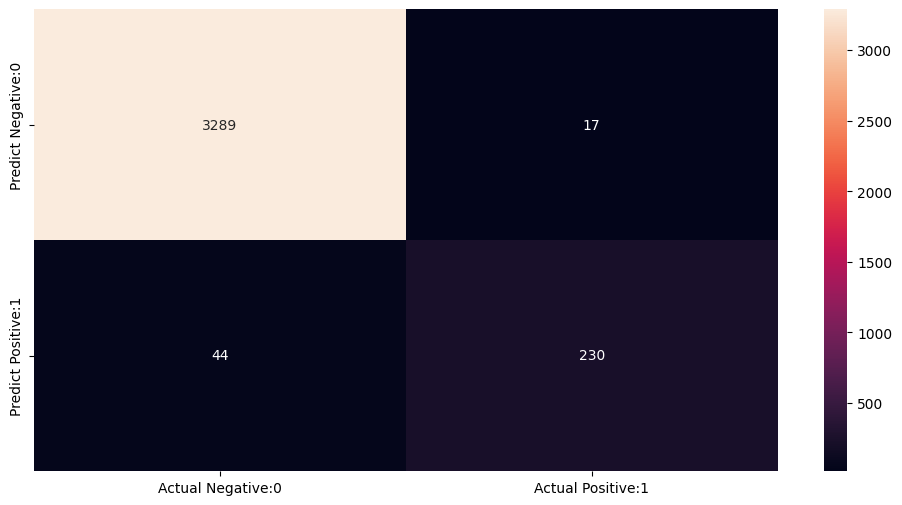

In [96]:
plt.rcParams['figure.figsize']=[12,6]
cm_matrix=pd.DataFrame(data=cm,columns=['Actual Negative:0','Actual Positive:1'],
                      index=['Predict Negative:0','Predict Positive:1'])
sns.heatmap(cm_matrix,annot=True,fmt='d')

In [97]:
from sklearn.metrics import precision_score,recall_score,classification_report
precision=precision_score(y_test,y_pred_li,pos_label=1)
recall=recall_score(y_test,y_pred_li,pos_label=1)
classif_report=classification_report(y_test,y_pred_li)

In [98]:
print('confusion matrix\n',cm)
print('\nPrecision:',precision)
print('\nrecall',recall)
print('\nclassification report\n',classif_report)

confusion matrix
 [[3289   17]
 [  44  230]]

Precision: 0.9311740890688259

recall 0.8394160583941606

classification report
               precision    recall  f1-score   support

           0       0.99      0.99      0.99      3306
           1       0.93      0.84      0.88       274

    accuracy                           0.98      3580
   macro avg       0.96      0.92      0.94      3580
weighted avg       0.98      0.98      0.98      3580



Text(0, 0.5, 'True Positive Rate')

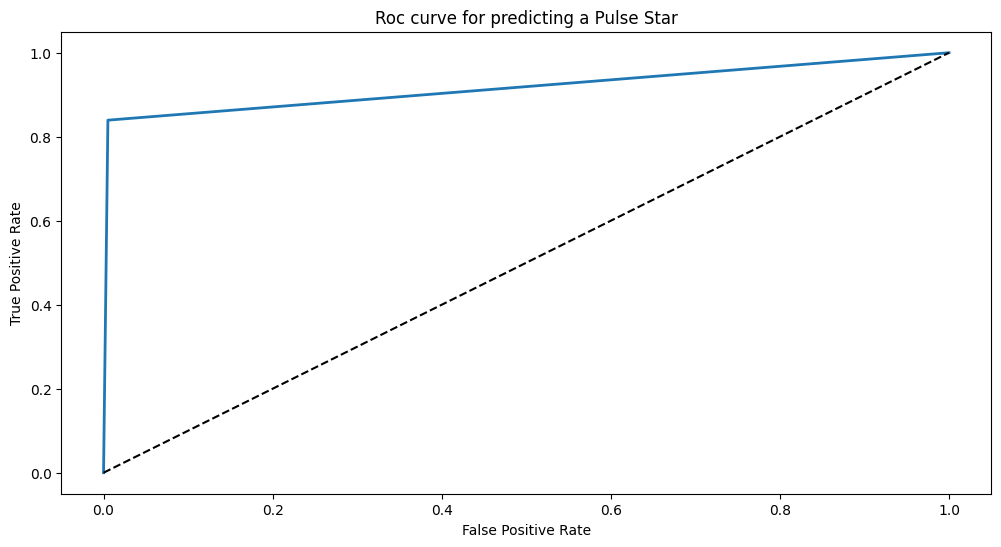

In [99]:
#plot ROC curve

from sklearn.metrics import roc_curve
fpr,tpr,thresholds=roc_curve(y_test,y_pred_li,pos_label=1)

plt.plot(fpr,tpr,linewidth=2)
plt.plot([0,1],[0,1],'k--')

plt.title('Roc curve for predicting a Pulse Star')
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')

In [100]:
#Calculating AUC-ROC score
from sklearn.metrics import roc_auc_score
ROC_AUC=roc_auc_score(y_test,y_pred_li)
print('roc_auc score:{:.4f}'.format(ROC_AUC))

roc_auc score:0.9171


In [101]:
from sklearn.model_selection import cross_val_score
CV_rocauc_score=cross_val_score(linear_svc,X_train,y_train,cv=10,scoring='roc_auc').mean()
print('Cross Validated ROC AUC:{:.4f}'.format(CV_rocauc_score))

Cross Validated ROC AUC:0.9756


In [102]:
from sklearn.model_selection import KFold

# Initialize KFold cross-validation
kfold=KFold(n_splits=5,shuffle=True,random_state=0)

# Perform cross-validation for linear_svc) using the specified folds

linear_scores=cross_val_score(linear_svc,X,y,cv=kfold)

In [103]:
print('Stratified cross_validation scores with linear kernel\n{}'.format(linear_scores))

Stratified cross_validation scores with linear kernel
[0.98296089 0.97458101 0.97988827 0.97876502 0.97848561]


In [104]:
print('Stratified cross_validation score with linear kernel\n{}'.format(linear_scores.mean()))

Stratified cross_validation score with linear kernel
0.9789361592529982


'''

Perform grid search with cross-validation to tune hyperparameters for Support Vector Classifier (SVC). 
Three sets of parameters are explored: linear kernel with varying regularization strength (C), radial basis function (RBF) kernel with different values of gamma and C, and polynomial kernelwith different degrees and gamma values. The grid search is conducted using 2-fold cross-validation and accuracy as the scoring metric. This comprehensive search aims to find the optimal combination of hyperparameters for the SVC model to achieve the best classification performance on the dataset.


'''


In [105]:
from sklearn.model_selection import GridSearchCV

parameters=[ {'C':[1,10,100,1000],'kernel':['linear']},
             {'C':[1,10,100,1000],'kernel':['rbf'],'gamma':[0.1,0.2,0.3,0.4,0.5,0.6,0.7,0.8,0.9]},
             {'C':[1,10,100,1000],'kernel':['poly'],'degree':[2,3,4],'gamma':[0.01,0.02,0.03,0.04,0.05]}
           ]

grid_search_cv=GridSearchCV(estimator=svc,
                            param_grid=parameters,
                            scoring='accuracy',
                            cv=2,
                            verbose=0)

#grid_search_cv.fit(X_train,y_train)

In [109]:
grid_search_cv

GridSearchCV(cv=2, estimator=SVC(),
             param_grid=[{'C': [1, 10, 100, 1000], 'kernel': ['linear']},
                         {'C': [1, 10, 100, 1000],
                          'gamma': [0.1, 0.2, 0.3, 0.4, 0.5, 0.6, 0.7, 0.8,
                                    0.9],
                          'kernel': ['rbf']},
                         {'C': [1, 10, 100, 1000], 'degree': [2, 3, 4],
                          'gamma': [0.01, 0.02, 0.03, 0.04, 0.05],
                          'kernel': ['poly']}],
             scoring='accuracy')

In [113]:
#grid_search_cv.fit(X_train,y_train)

In [112]:
#print('Grid search CV best score:{:.4f}\n'.format(grid_search_cv.best_score_))
#print('Parameters that give best results:\n',grid_search_cv.best_params_)
#print('\nEstimator that was chosen by the search:\n',grid_search_cv.best_estimator_)